In [2]:
import matplotlib.pyplot as plt

# 支持多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

# 中文的正常显示
plt.rcParams['font.sans-serif']=['SimHei'] 

#用来正常坐标轴的数字的负号
plt.rcParams['axes.unicode_minus']=False 

# 查看GPU状态

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 读取数据-生成器方法

In [6]:
!tree data/cats_and_dogs_small

卷 大数据与人工智能 的文件夹 PATH 列表
卷序列号为 00000014 0C3E:0BA7
E:\DEEPLEARNING\DATA\CATS_AND_DOGS_SMALL
├─test
│  ├─cats
│  └─dogs
├─train
│  ├─cats
│  └─dogs
└─validation
    ├─cats
    └─dogs


In [7]:
import os

base_dir = 'data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 数据增强

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# 数据增强
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 搭建自定义CNN网络

In [9]:
import tensorflow.keras as keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), 
                              activation='relu',
                              input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# 训练模型

In [10]:
# 编译模型
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), # 还可以写成optimizer='RMSprop'或者optimizer='rmsprop'
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 19s 137ms/step - loss: 0.6916 - accuracy: 0.5340 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 2/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6617 - accuracy: 0.5925 - val_loss: 0.6841 - val_accuracy: 0.5260
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6226 - accuracy: 0.6525 - val_loss: 0.6704 - val_accuracy: 0.5860
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5824 - accuracy: 0.6970 - val_loss: 0.5993 - val_accuracy: 0.6650
Epoch 5/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5422 - accuracy: 0.7230 - val_loss: 0.6679 - val_accuracy: 0.6110
Epoch 6/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5143 - accuracy: 0.7350 - val_loss: 0.5759 - val_accuracy: 0.6950
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.4852 - accuracy: 0.7625 - val_loss: 0.5915 - val_accuracy: 0.69

In [ ]:
history.history

# 可视化训练过程

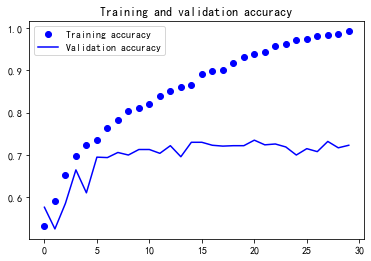

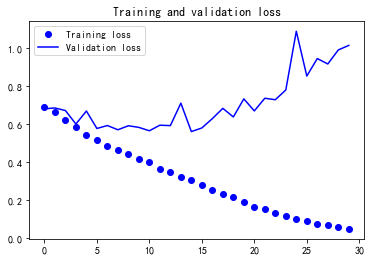

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

# 模型评估

In [22]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('测试集准确率：', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 2s 36ms/step - loss: 1.0084 - accuracy: 0.7240
测试集准确率： 0.7239999771118164


# 保存训练好的模型

In [13]:
model.save('modelHub/CatsAndDogsCustom.h5')

# 调用保存在本地的模型

In [14]:
import tensorflow.keras as keras
model = keras.models.load_model('modelHub/CatsAndDogsCustom.h5')

# 预测新的图片

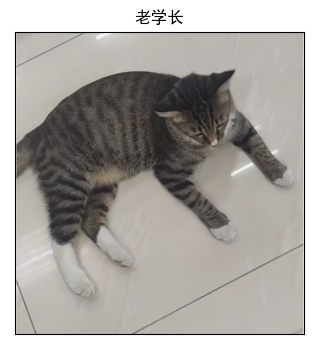

In [15]:
import cv2
img = cv2.imread("data4Test/cat1.jpg")
b,g,r = cv2.split(img)
img_new = cv2.merge([r,g,b])

plt.figure(figsize=(6,4),dpi=100)
plt.imshow(img_new),plt.title('老学长')
plt.xticks([]), plt.yticks([])
plt.show();

In [16]:
pre2name ={0:'猫', 1:'狗'}

img_input = cv2.resize(img, (150,150))
img_input = img_input.reshape(1,150, 150, 3)


result = model.predict(img_input)[0]   # 二分类问题预测

print("预测结果为：", pre2name[round(result[0])])

1/1 [==============================] - 0s 467ms/step
预测结果为： 猫


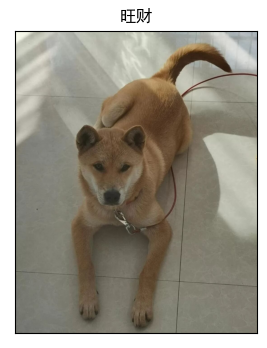

In [18]:
import cv2
img = cv2.imread("data4Test/dog1.jpg")

b,g,r = cv2.split(img)
img_new = cv2.merge([r,g,b])

plt.figure(figsize=(6,4),dpi=100)
plt.imshow(img_new),plt.title('旺财')
plt.xticks([]), plt.yticks([])
plt.show();

In [19]:
pre2name ={0:'猫', 1:'狗'}

img_input = cv2.resize(img, (150,150))
img_input = img_input.reshape(1,150, 150, 3)


result = model.predict(img_input)[0]   # 二分类问题预测

print("预测结果为：", pre2name[round(result[0])])

1/1 [==============================] - 0s 13ms/step
预测结果为： 狗
